Check for winter months


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("training_set1")
df = df[['year','Release','MoR','Theaters','Budgets','Potential','Color','Total Gross']]
df.head()

,year,Release,MoR,Theaters,Budgets,Potential,Color,Total Gross
0,2000,How the Grinch Stole Christmas,11,3256,123.0,Blockbuster,green,260.044825
1,2000,Mission: Impossible II,5,3669,125.0,Blockbuster,green,215.409889
2,2000,Gladiator,5,3188,103.0,Blockbuster,green,187.705427
3,2000,The Perfect Storm,6,3407,120.0,Blockbuster,green,182.618434
4,2000,Meet the Parents,10,2697,55.0,Blockbuster,green,166.244045


In [2]:
df=df[df['MoR']>=10]
df.head()

,year,Release,MoR,Theaters,Budgets,Potential,Color,Total Gross
0,2000,How the Grinch Stole Christmas,11,3256,123.0,Blockbuster,green,260.044825
4,2000,Meet the Parents,10,2697,55.0,Blockbuster,green,166.244045
12,2000,Cast Away,12,3061,90.0,Blockbuster,green,233.632142
16,2000,Unbreakable,11,2708,75.0,Decent,blue,95.011339
19,2000,Stuart Little,12,3151,103.0,Decent,blue,140.035367


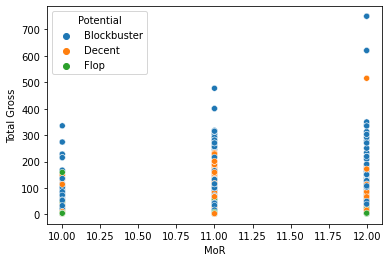

In [3]:
sb.scatterplot(y='Total Gross',x='MoR',hue='Potential',data=df)
plt.show()

In [4]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy import stats

In [5]:
X = df[['MoR','Theaters','Budgets']]
y = df['Total Gross']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [7]:
model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)
print(model1.coef_)
print(model1.intercept_)

[9.35649984 0.04692677 0.2775384 ]
-157.24102292007774


In [8]:
pred1 = model1.predict(X_test)

In [9]:
rss = np.sum((pred1-y_test)**2)
rss

1006701.2336446366

In [10]:
ymean = np.mean(y_test)
tss = np.sum((pred1-ymean)**2)
tss

1184588.1774150818

In [12]:
r2 = (tss-rss)/rss
r2

0.1767028169086747

In [20]:
from sklearn.neighbors import KNeighborsRegressor as knn

In [15]:
modelk = knn()
modelk

KNeighborsClassifier()

In [16]:
def mse(preds,test):
    
    res = np.mean((preds-test)**2)
    return res

In [19]:
y_train

255      25.581229
2202    113.929605
123      51.804714
1680     14.618727
1132    120.146040
           ...    
156      14.694904
252     317.575550
702      37.629831
1131     19.806188
241      33.561137
Name: Total Gross, Length: 574, dtype: float64

In [27]:
mses = []
for i in range(1,5):
    
    modelknn = knn(n_neighbors=i)
    modelknn.fit(X_train,y_train)
    predsi = modelknn.predict(X_test)
    res = mse(predsi,y_test)
    mses.append(res)
print(mses)
    

[1929.9872670333593, 2473.6453467257984, 2336.152176648387, 2425.6652193893196]


In [23]:
mses = []

for i in preds:
    
    mses.append(mse(i,y_test))

array([ 11.31042  , 190.3072997,  63.7364868, 173.7347184,   7.8838323,
       352.2520706,  72.4769294,  88.9029179, 162.9403232, 168.3175656,
        60.3069278,  19.7615957,  50.9672632,  34.8845401,  58.1932163,
         8.2755368,  80.505762 ,  49.0445115,  23.292049 ,  67.7038979,
         9.381989 ,  18.3475121,  47.8133078,  33.6444336,  14.5629769,
       118.1235451,  12.5597248,   7.8838323, 291.227452 ,  36.820247 ,
       155.4817945, 159.1131071,  31.5778792, 229.1513141,  91.8748294,
       166.1920012,  47.3285866,  22.6917491, 114.2331298,  32.0183919,
         8.7040951,  20.3033125,  36.8911868,  30.0937387,  29.7064398,
        61.2934208,  33.1786498,  21.1073327, 101.3572885,  36.6191504,
        13.8260862,  81.2754802, 114.2331298,  67.8817628,  12.5597248,
       174.8064503, 112.5745586, 180.4355814,   7.7947111,  57.4308072,
       135.7403625,   4.326958 , 214.4173597,  29.7064398, 190.4422081,
        28.884119 , 181.5914435,  68.3517192,   9.3581742,   5.1